# Network Science (HS21)
## Assignment 3

### Ben     Murphy          16-714-925
### Florian Rüegsegger      14-714-737

#### The excercise was solved together in person

In [142]:
import networkx as nx
from networkx.readwrite.gml import read_gml
from networkx.readwrite.graphml import  read_graphml
from networkx.algorithms import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality
from networkx.algorithms.smallworld import random_reference
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
from scipy.stats import pearsonr, spearmanr, kendalltau


## A03.1

### Utility functions

In [134]:

def plot_centralities(graphs: Dict[str,nx.Graph]):
    degrees = {}
    closenesses = {}
    betweennesses = {}
    eigenvectors = {}
    for key, value in graphs.items():
        degrees[key] = list(degree_centrality(value).values())
        closenesses[key] = list(closeness_centrality(value).values())
        betweennesses[key] = list(betweenness_centrality(value).values())
        eigenvectors[key] = list(eigenvector_centrality(value).values())
        

    plot_scatter(degrees,closenesses,"closeness~degree")
    plot_scatter(degrees,betweennesses,"betweenness~degree")
    plot_scatter(degrees,eigenvectors,"eigenvector~degree")
    plot_scatter(closenesses,betweennesses,"betweenness~closeness")
    plot_scatter(closenesses,eigenvectors,"eigenvector~closeness")
    plot_scatter(eigenvectors,betweennesses,"betweenness~eigenvector")
    
    

def plot_scatter(xs, ys, title: str):
    keys = list(xs.keys())
    fig, axs = plt.subplots(1,3,figsize=(28,10))
    fig.suptitle(title)
    max_x = 0
    min_x = 99
    max_y = 0
    min_y = 0
    for i in range(len(xs)):
        key = keys[i]
        x = xs[key]
        y = ys[key]
        ax = axs[i]

        if max_x < max(x):
            max_x = max(x)
        if max_y < max(y):
            max_y = max(y)

        if min_x > min(x):
            min_x = min(x)
        if min_y > min(y):
            min_y = min(y)

        labels = title.split("~")

        pearson = pearsonr(x, y)
        spearman = spearmanr(x, y)
        kendall = kendalltau(x, y)

        text = f"pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}"
        ax.scatter(x, y)

        ax.set_title(f"{key}")
        ax.set_xlabel(labels[1])
        ax.set_ylabel(labels[0])

        ax.text(0.5,-0.2,text,ha="center",transform=ax.transAxes)

    for ax in axs:
        ax.set_xlim(min_x-0.01,max_x+0.01)
        ax.set_ylim(min_y-0.01,max_y+0.01)
    print(min_x, max_x)
    print(min_y, max_y)
    plt.show()


0.000819000819000819 0.5076142131979695
0 0.6480263157894737


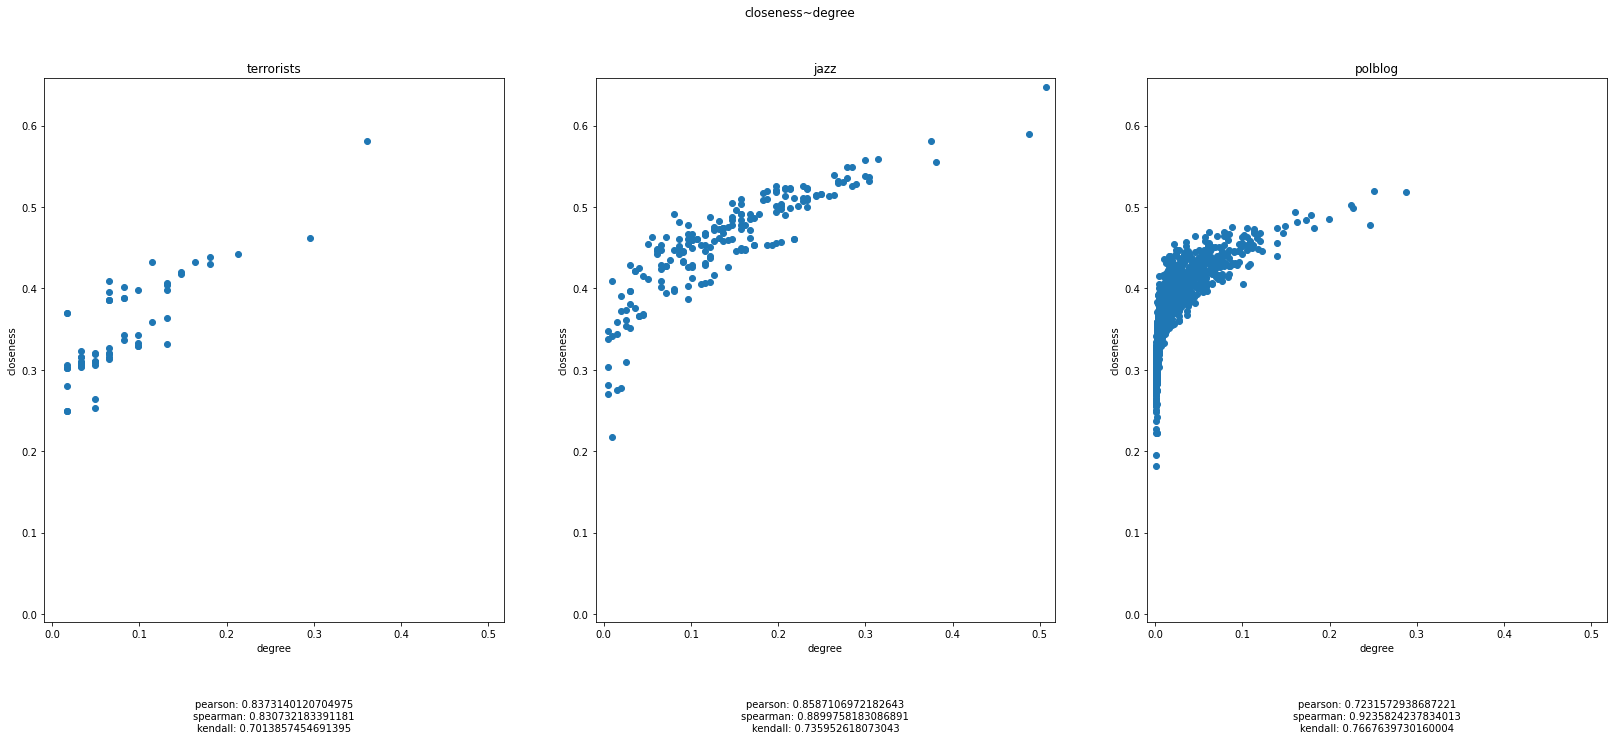

0.000819000819000819 0.5076142131979695
0 0.5870030455276356


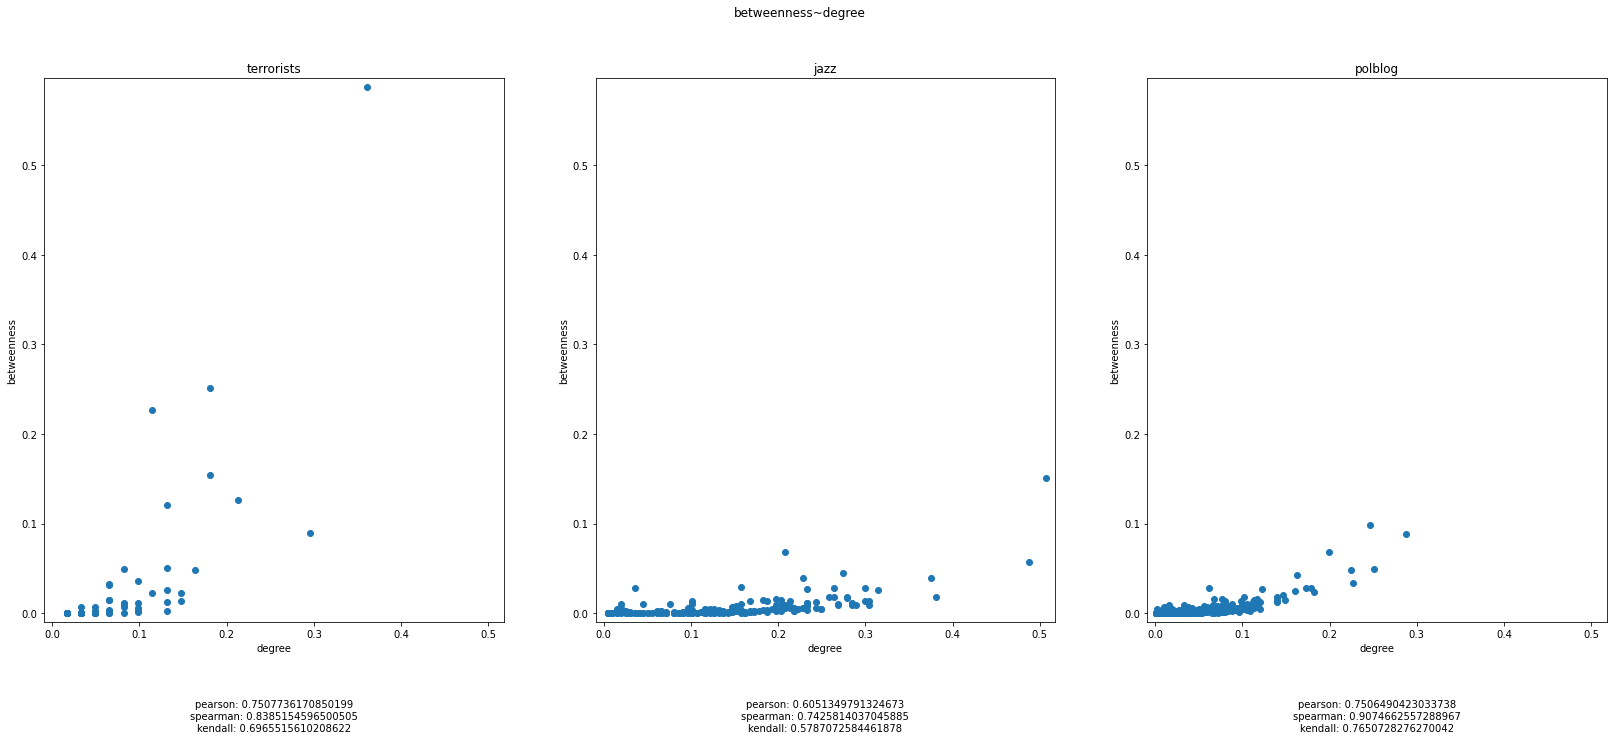

0.000819000819000819 0.5076142131979695
0 0.41250603258459584


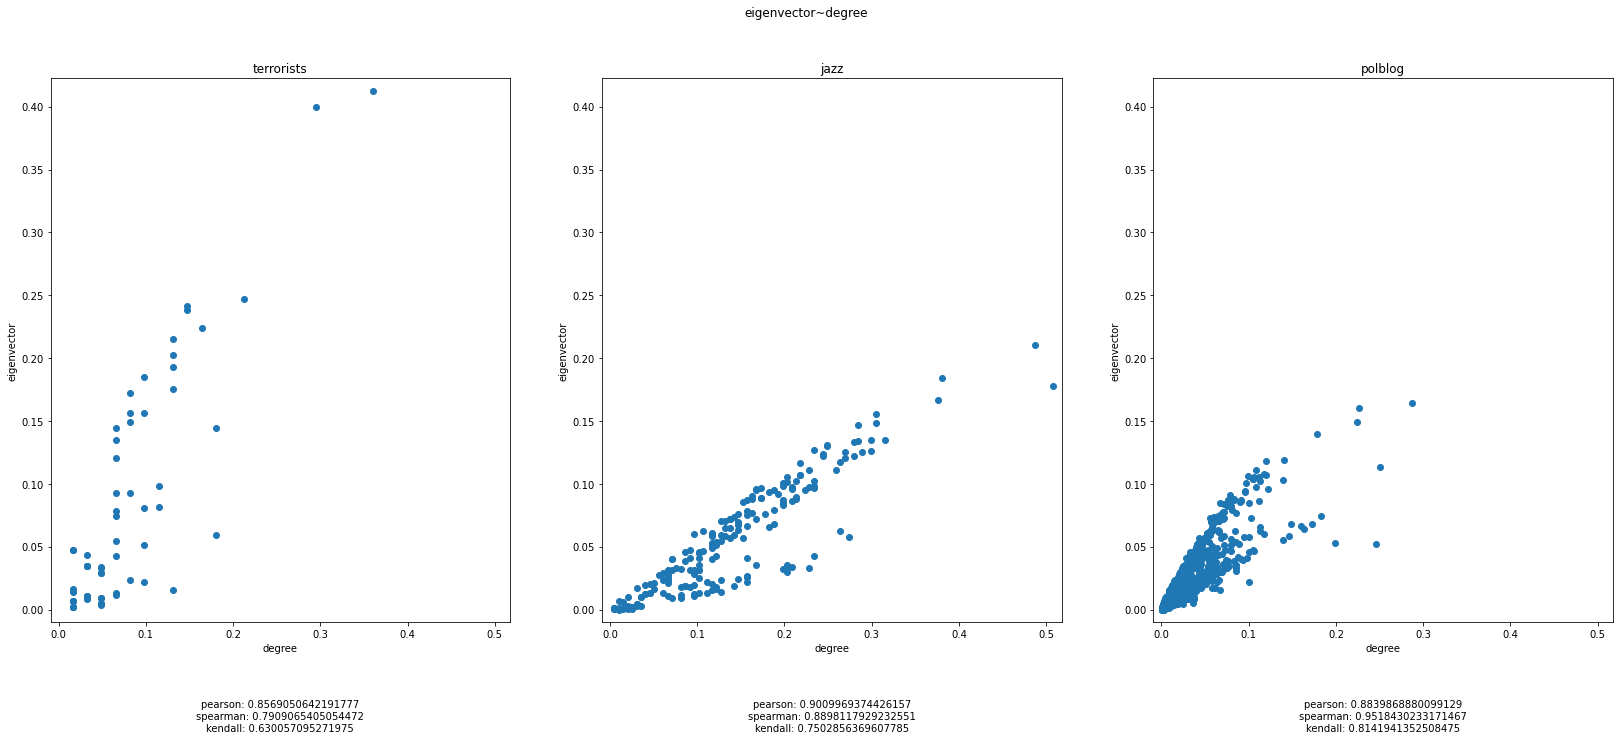

0.18172347075457657 0.6480263157894737
0 0.5870030455276356


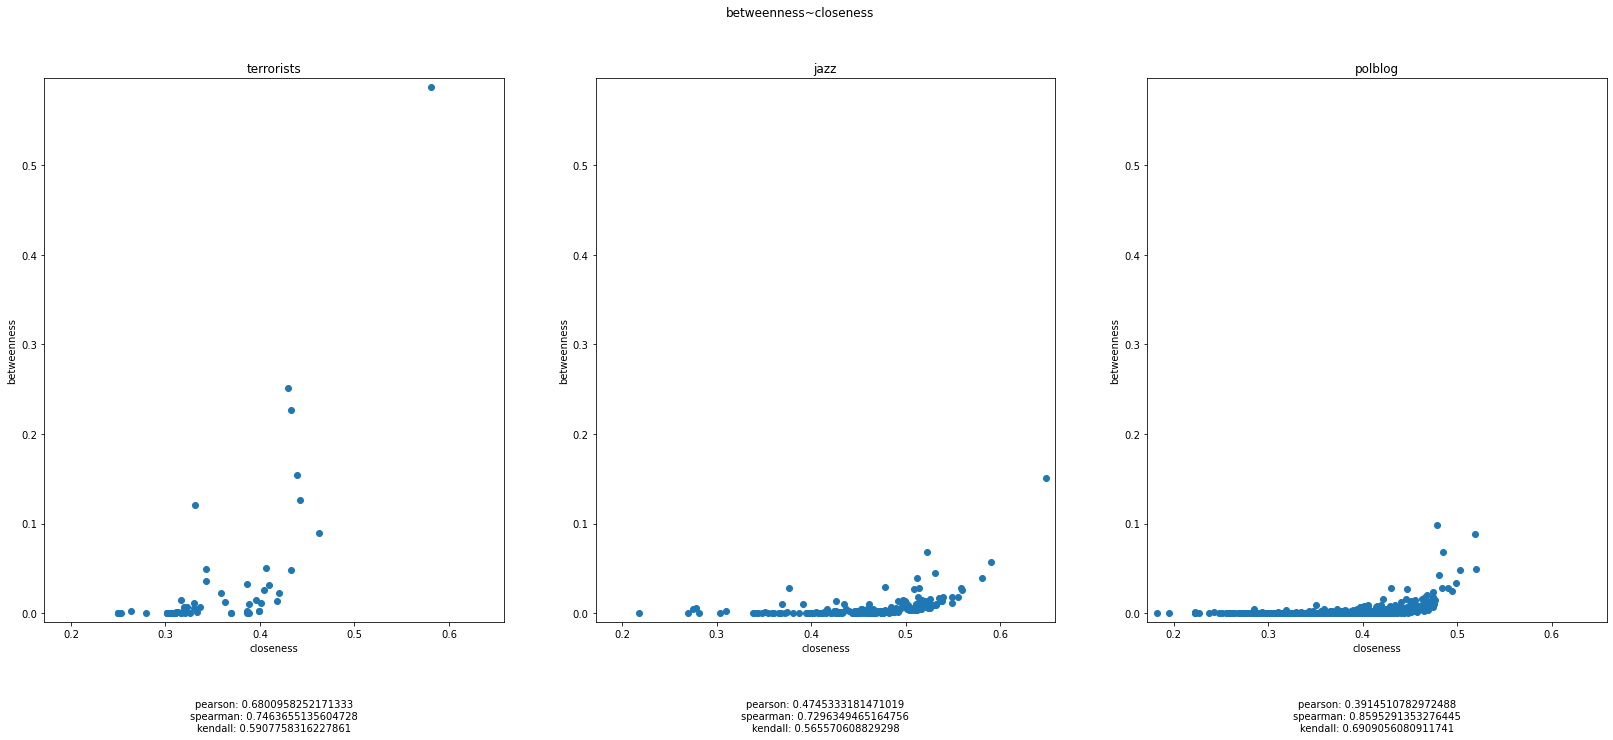

0.18172347075457657 0.6480263157894737
0 0.41250603258459584


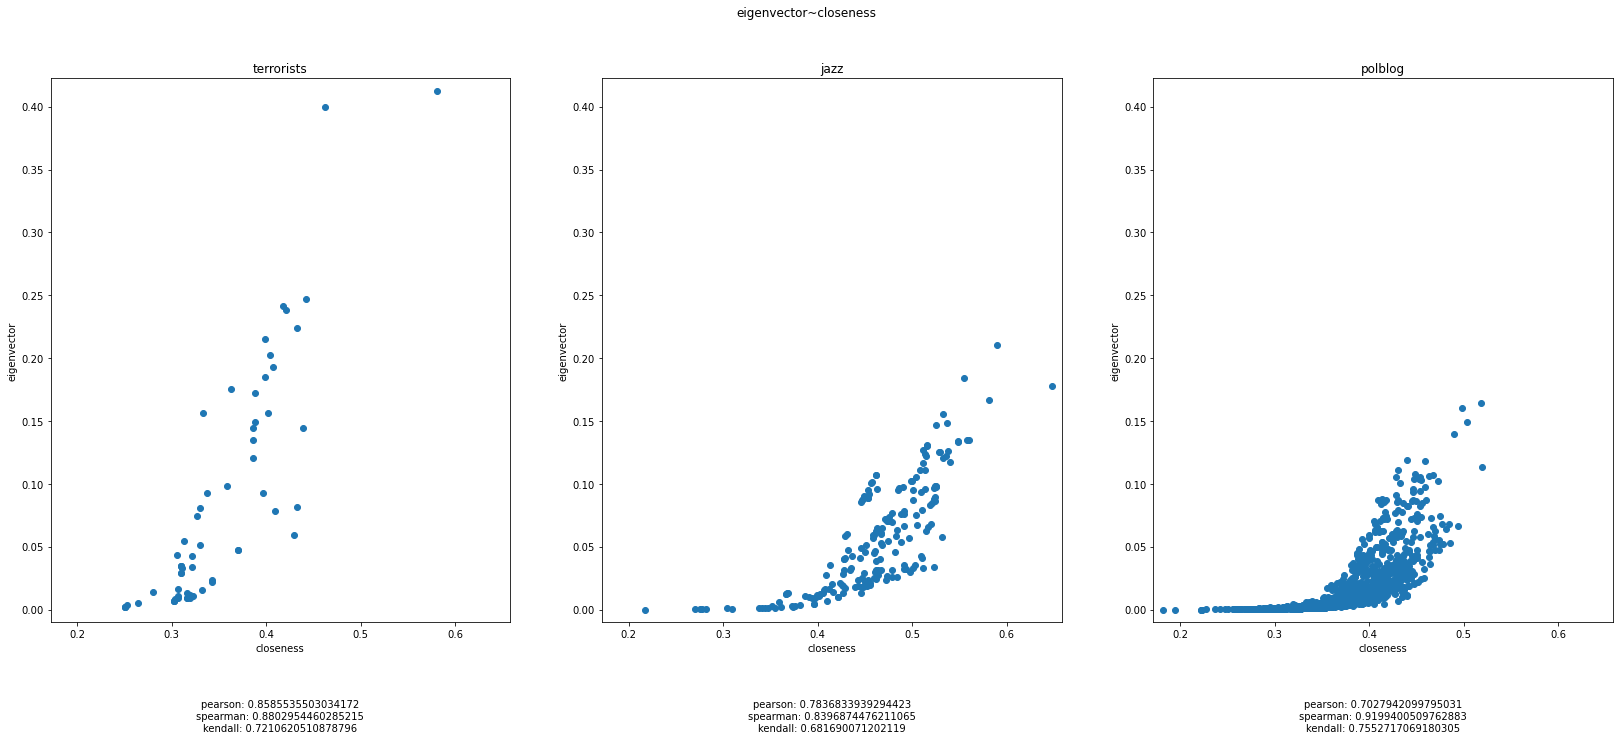

1.5451698984148958e-08 0.41250603258459584
0 0.5870030455276356


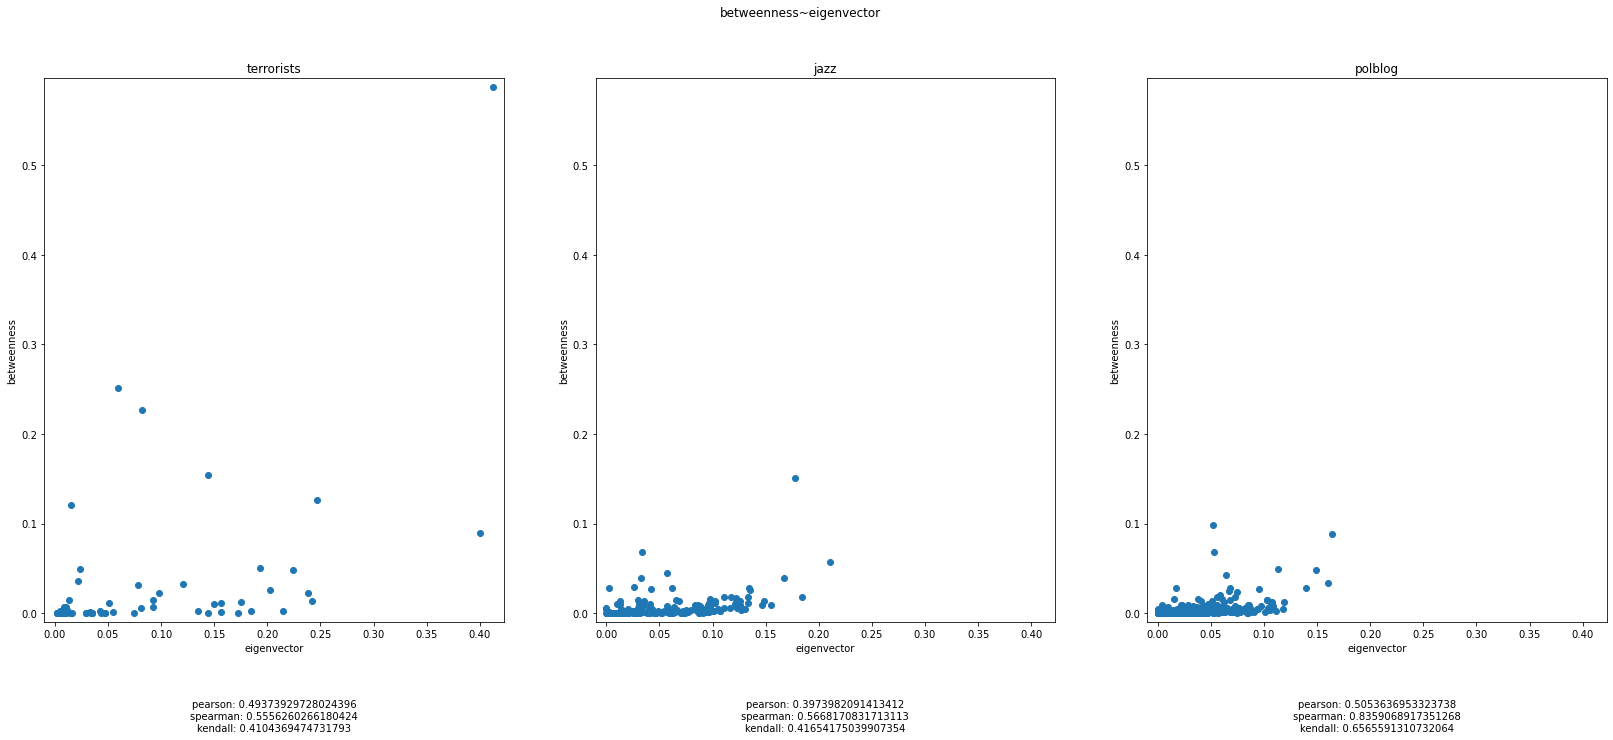

In [121]:
graphs = {}
graphs["terrorists"] = read_gml("data/graph_terrorists.gml")
graphs["jazz"] = read_gml("data/graph_jazz_collab.gml")
graphs["polblog"] = read_gml("data/graph_polblog.gml")
plot_centralities(graphs)

# Jazz Discussion

The degree centrality is equivalent to say that the importance of a node is given by how much it is connected to others
in the network
+ Pro: a measure of popularity in a social network
+ Pro: simple and often correlated with more complex metrics
+ Con: does not tell anything about “where” is the node
+ Con: does not discriminate “quality” of connections

When it comes to degree centrality we can safely assume that in the case of the jazz network there are a couple of highly connected nodes. However we cannot judge the quality of these nodes since these particular nodes might have been very active but produced mediocre content.



Closeness centrality is stating that the importance of a node
is given by how short are the distances from it to all others
+ Pro: identifies top sources of spreading - great for information, diseases, public transport, …
+ Pro: “topologically” meaningful concept of centrality
+ Con: requires computing (𝑁 Choose 2) distances - very demanding for not small 𝑁
+ Con: sources are central, not bottlenecks

The degree\~closeness plot suggests that the network is centered around the high degree nodes since an increase in degree shows an increase in closeness. This is also supported by the closeness\~eigenvector plot. It clearly shows an exponential rise which suggests that the higher the importance of the node the shorter the distances to the other nodes. It points very much to a "star-like" network.



Betweenness centrality:The importance of each node is given by how much they can
route / channel information flow within the network
+ Pro: identifies high-throughput nodes - great for vulnerability analysis
+ Pro: “topologically” meaningful centrality
+ Con: again, (𝑁 choose 2) shortest paths to compute
+ Con: does not identify sources, only bottlenecks

The plots identify the high degree nodes as the high-throughput nodes. 

Eigenvector Centrality
A node that is more important if it is connected to important
nodes

The popular musicians are connected with other popular musicians. 


## A03.02

### Utility functions

In [135]:
def solve_03_02(graphs: Dict[str,nx.Graph]):
    randomized_graphs = {}
    for key,value in graphs.items():
        randomized_graphs[key] = random_reference(value, connectivity=False)

    centralities = get_centralities(graphs)
    centralities_random = get_centralities(randomized_graphs)
    
    
    plot_scatter(centralities["degree"],centralities_random["degree"],"degree_rand~degree")
    plot_scatter(centralities["closeness"],centralities_random["closeness"],"closeness_rand~closeness")
    plot_scatter(centralities["between"],centralities_random["between"],"between_rand~between")
    plot_scatter(centralities["eigen"],centralities_random["eigen"],"eigen_rand~eigen")

def get_centralities(graphs: Dict[str,nx.Graph]):
    centralities = {}
    centralities["degree"] = {}
    centralities["closeness"] = {}
    centralities["between"] = {}
    centralities["eigen"] = {}
    for key, value in graphs.items():
        centralities["degree"][key] = list(degree_centrality(value).values())
        centralities["closeness"][key] = list(closeness_centrality(value).values())
        centralities["between"][key] = list(betweenness_centrality(value).values())
        centralities["eigen"][key] = list(eigenvector_centrality(value).values())
    return centralities


0.000819000819000819 0.5076142131979695
0 0.5076142131979695


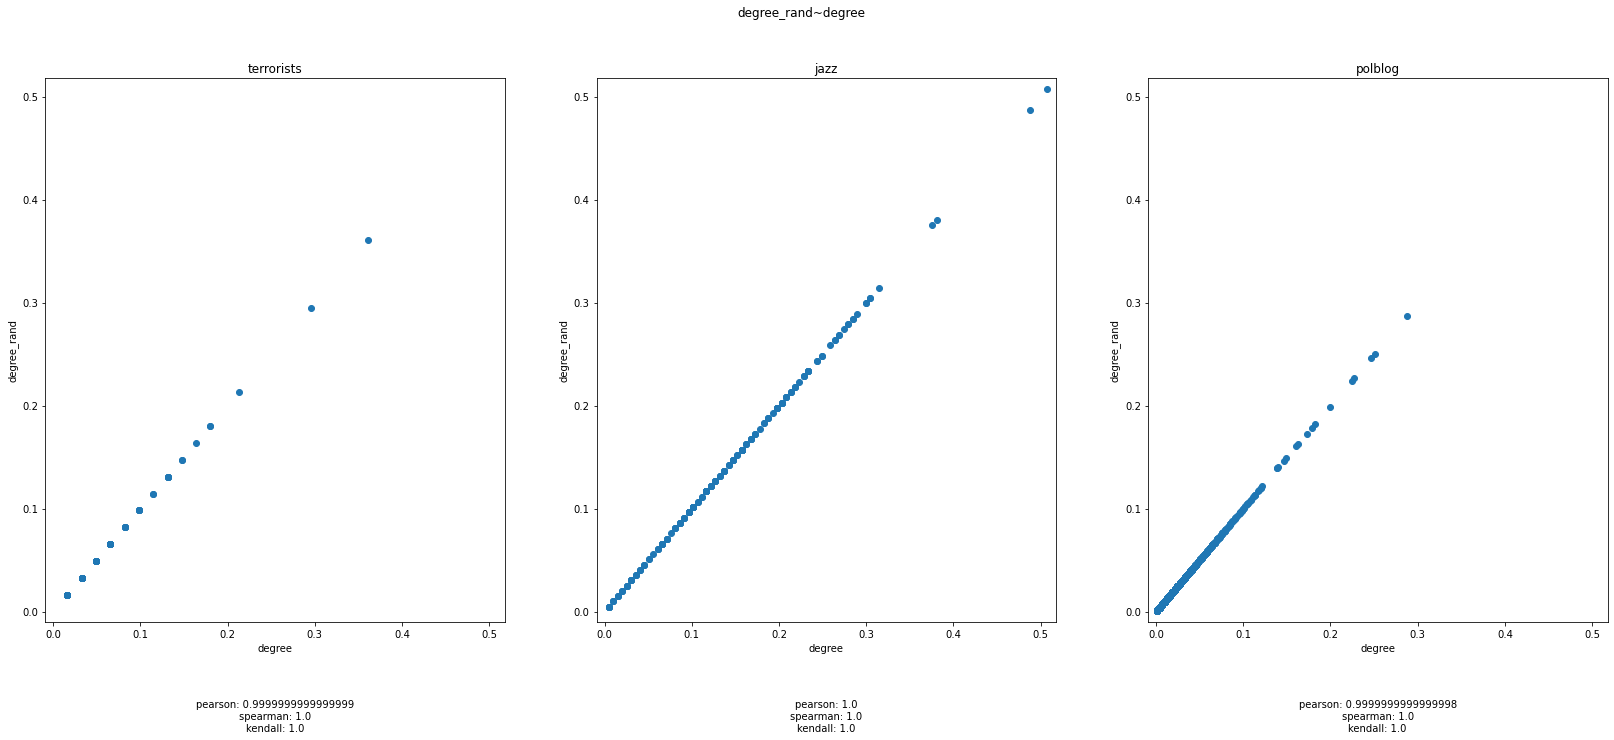

0.18172347075457657 0.6480263157894737
0 0.6632996632996633


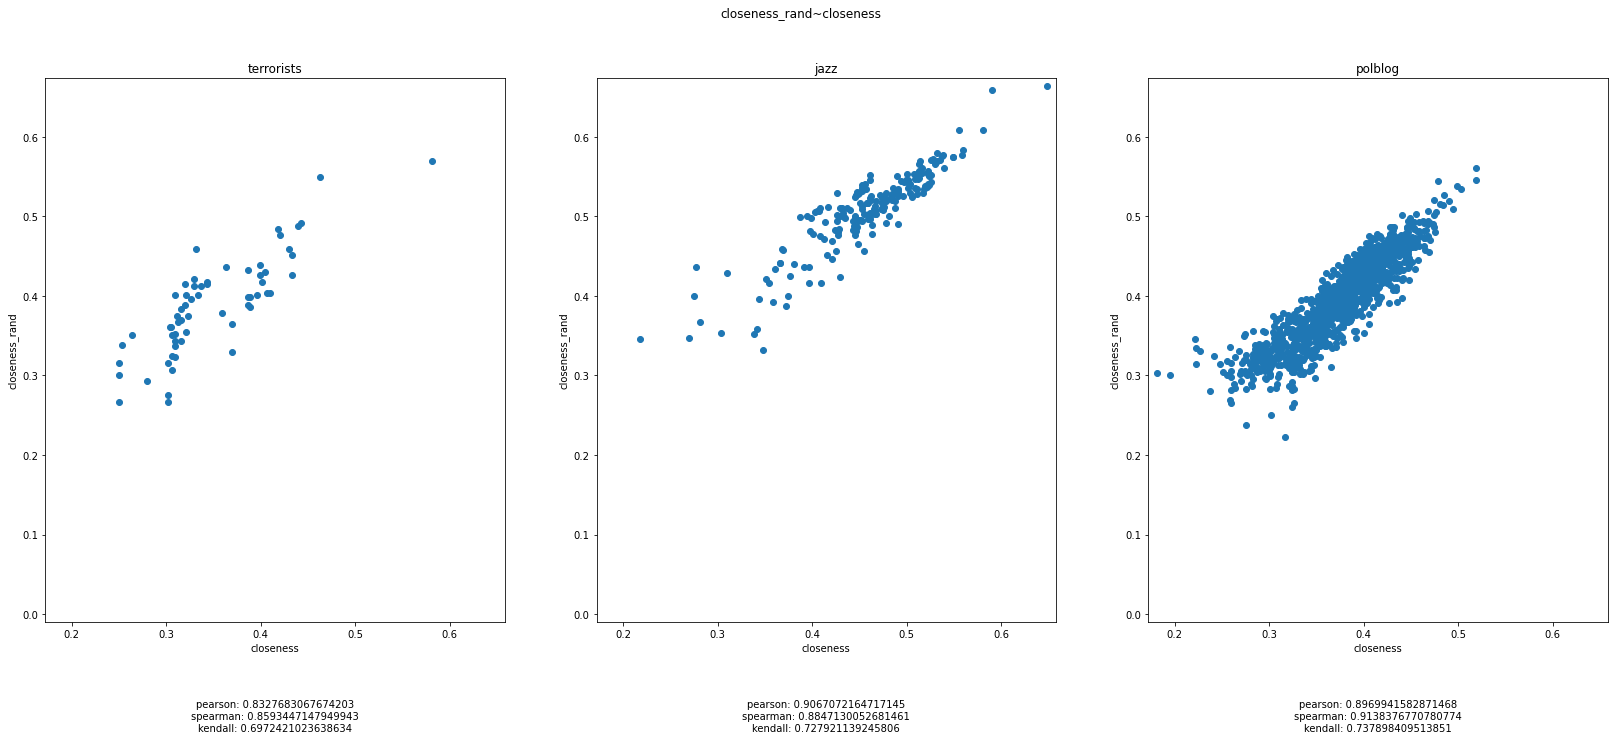

0.0 0.5870030455276356
0 0.2766331829711772


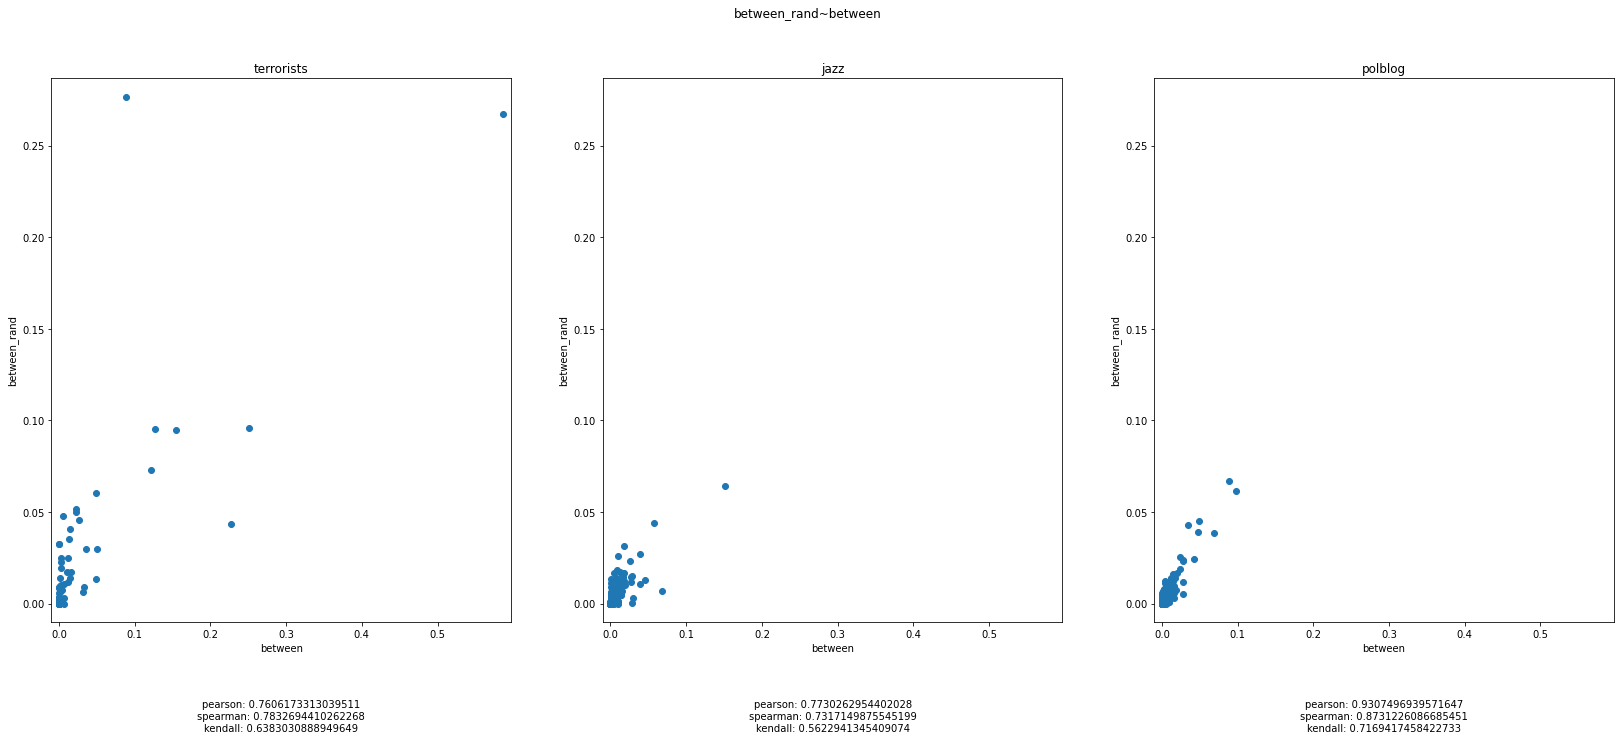

1.5451698984148958e-08 0.41250603258459584
0 0.4101322260239006


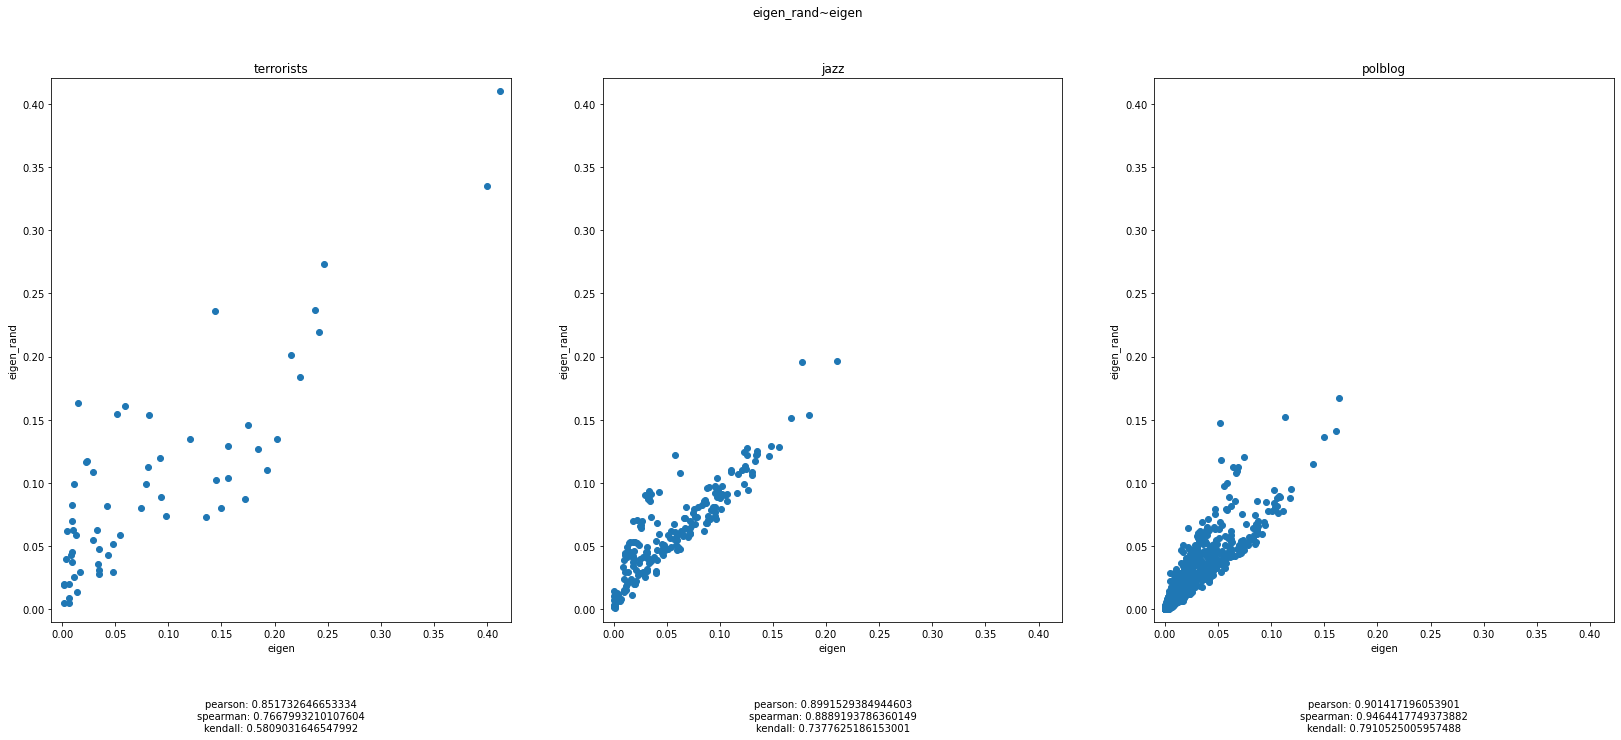

In [136]:
solve_03_02(graphs)

#### Degree centralisation discussion

If we randomise a graph, then the degree of a single node does not change. Therefore the degree centralisation of a randomised graph does not change either.

### A03.03

#### utility functions

In [160]:
def solve_03_03(graph: nx.Graph):
    alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    pr_0 = list(pagerank(graph, 0.85).values())

    spearmans = []
    for alpha in alphas:
        pr = list(pagerank(graph,alpha).values())
        spearmans.append(spearmanr(pr,pr_0)[0])
    
    plt.scatter(alphas, spearmans)
    plt.xlabel("alpha")
    plt.ylabel("p(alpha)")
    plt.show()
    

11
11
[0.90985771833617, 0.932268656203263, 0.9523875012176746, 0.9695380859878635, 0.9791706062012573, 0.9869293405075842, 0.9942411167076379, 0.9993754046976445, 0.9993868651619079, 0.9972781397374408, 0.9955533398657982]


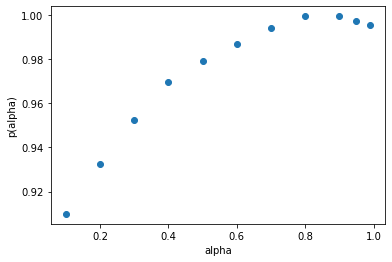

In [161]:
graph = read_graphml("data/Florida_foodweb.graphml")
solve_03_03(graph)